In [8]:
import pickle
import os

# Define the folder paths where each model's history is stored
folders = {
    "effNet": "EfficientNet Model\efficientNet_Training_history.pkl",
    "mobileNet": "MobileNet Model\mobileNet_Training_history_latest.pkl",
    "resNet": "ResNet Model\\resNet_Training_history_fine_tune.pkl",
    "vgg16": "VGG16\\vgg16_Training_history_1.pkl",
    "xception": "Xception Model\\Final\\xception_Training_history_fine_tune_final.pkl"
}

histories = {}

for model_name, file_path in folders.items():  # Directly iterate over the file paths
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, "rb") as f:
            histories[model_name] = pickle.load(f)
    else:
        print(f"Warning: {file_path} not found!")


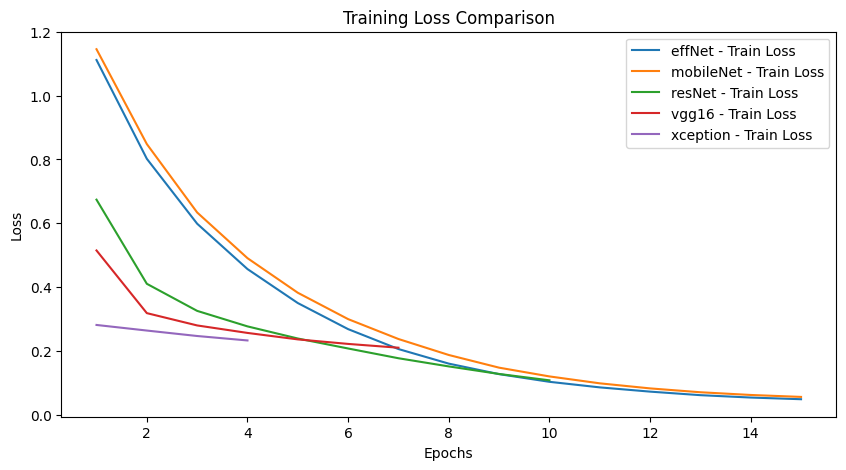

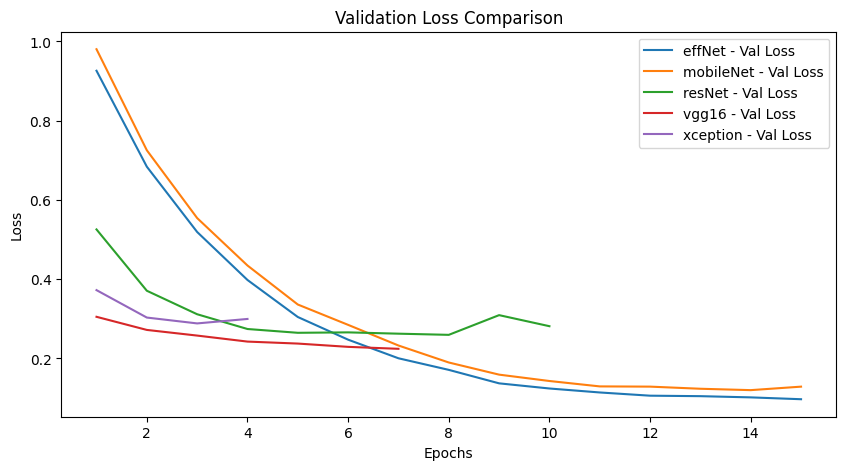

In [10]:
import matplotlib.pyplot as plt

# Training Loss Plot
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], label=f"{name} - Train Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.show()

# Validation Loss Plot
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    epochs = range(1, len(history['val_loss']) + 1)
    plt.plot(epochs, history['val_loss'], label=f"{name} - Val Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation Loss Comparison")
plt.legend()
plt.show()


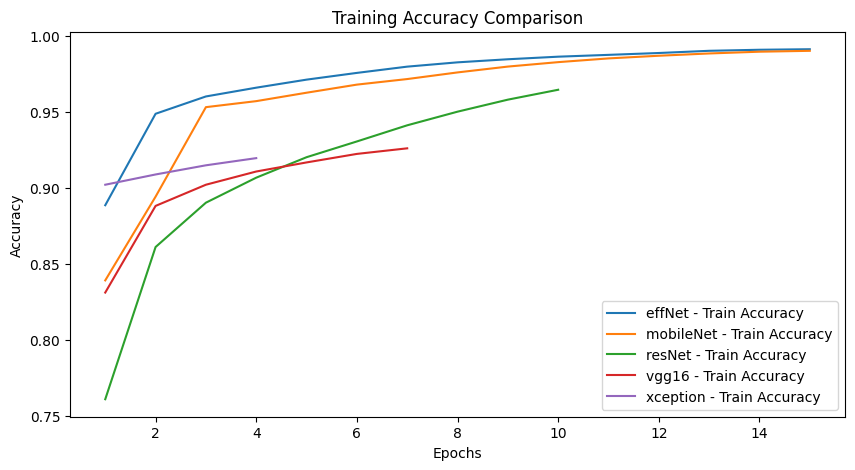

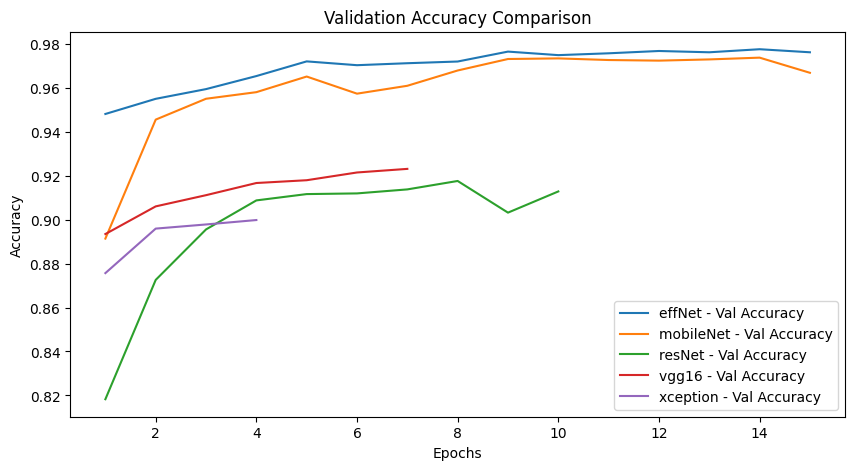

In [11]:
import matplotlib.pyplot as plt

# Training Accuracy Plot
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], label=f"{name} - Train Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Comparison")
plt.legend()
plt.show()

# Validation Accuracy Plot
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    epochs = range(1, len(history['val_accuracy']) + 1)
    plt.plot(epochs, history['val_accuracy'], label=f"{name} - Val Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Comparison")
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [14]:
#pre-processing the test dataset
test_set = image_dataset_from_directory(
    "test",  # Same dataset directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1000 files belonging to 4 classes.


In [15]:
import numpy as np
import tensorflow as tf

# Extract images and labels from the dataset
X_test = []
y_test = []

for images, labels in test_set:
    X_test.append(images.numpy())  # Convert tensor to NumPy array
    y_test.append(labels.numpy())

# Convert list to NumPy array
X_test = np.concatenate(X_test, axis=0)  # Stack all batches
y_test = np.concatenate(y_test, axis=0)  # Stack labels

# Save as .npy files
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("X_test.npy and y_test.npy saved successfully!")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test.npy and y_test.npy saved successfully!
X_test shape: (1000, 224, 224, 3)
y_test shape: (1000, 4)


In [25]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

print("Loaded X_test shape:", X_test.shape)  # Should be (1000, 224, 224, 3)
print("Loaded y_test shape:", y_test.shape)  # Should be (1000, 4) if categorical


Loaded X_test shape: (1000, 224, 224, 3)
Loaded y_test shape: (1000, 4)


#effNet Model

In [28]:
effNet = tf.keras.models.load_model("EfficientNet Model\efficientNet_model.h5")

In [29]:
from sklearn.metrics import classification_report

y_pred = effNet.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=["CNV", "DME", "DRUSEN", "NORMAL"]))


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 494ms/step
              precision    recall  f1-score   support

         CNV       0.90      0.98      0.94       250
         DME       0.99      0.99      0.99       250
      DRUSEN       0.99      0.89      0.94       250
      NORMAL       1.00      0.99      0.99       250

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [35]:
mobNet = tf.keras.models.load_model("MobileNet Model\mobileNet_model_latest.keras")


c:\Users\Shasw\Desktop\Dataset\tensorflow_env\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 178 variables whereas the saved optimizer has 354 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
from sklearn.metrics import classification_report

y_pred = mobNet.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=["CNV", "DME", "DRUSEN", "NORMAL"]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
              precision    recall  f1-score   support

         CNV       0.88      1.00      0.94       250
         DME       0.99      0.99      0.99       250
      DRUSEN       1.00      0.87      0.93       250
      NORMAL       1.00      1.00      1.00       250

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.97      0.96      0.96      1000



In [37]:
resNet = tf.keras.models.load_model("ResNet Model\\resNet_model_fine_tune.h5")


In [38]:
from sklearn.metrics import classification_report

y_pred = resNet.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=["CNV", "DME", "DRUSEN", "NORMAL"]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
              precision    recall  f1-score   support

         CNV       0.81      0.98      0.88       250
         DME       0.91      0.96      0.93       250
      DRUSEN       0.98      0.39      0.56       250
      NORMAL       0.73      0.98      0.83       250

    accuracy                           0.82      1000
   macro avg       0.86      0.82      0.80      1000
weighted avg       0.86      0.82      0.80      1000



In [39]:
vgg16 = tf.keras.models.load_model("VGG16\\vgg16_model_1.h5")


In [41]:
from sklearn.metrics import classification_report

y_pred = vgg16.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=["CNV", "DME", "DRUSEN", "NORMAL"]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step
              precision    recall  f1-score   support

         CNV       0.73      0.98      0.84       250
         DME       0.90      0.95      0.93       250
      DRUSEN       0.99      0.51      0.68       250
      NORMAL       0.90      0.98      0.94       250

    accuracy                           0.86      1000
   macro avg       0.88      0.86      0.85      1000
weighted avg       0.88      0.86      0.85      1000



In [45]:
#pre-processing the test dataset
test_set_xception = image_dataset_from_directory(
    "test",  # Same dataset directory
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(299, 299),
    shuffle=False,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1000 files belonging to 4 classes.


In [46]:
import numpy as np
import tensorflow as tf

# Extract images and labels from the dataset
X_test_new = []
y_test_new = []

for images, labels in test_set_xception:
    X_test_new.append(images.numpy())  # Convert tensor to NumPy array
    y_test_new.append(labels.numpy())

# Convert list to NumPy array
X_test_new = np.concatenate(X_test_new, axis=0)  # Stack all batches
y_test_new = np.concatenate(y_test_new, axis=0)  # Stack labels

# Save as .npy files
np.save("X_test.npy", X_test_new)
np.save("y_test.npy", y_test_new)

print("X_test.npy and y_test.npy saved successfully!")
print("X_test shape:", X_test_new.shape)
print("y_test shape:", y_test_new.shape)

X_test.npy and y_test.npy saved successfully!
X_test shape: (1000, 299, 299, 3)
y_test shape: (1000, 4)


In [47]:
xception = tf.keras.models.load_model("Xception Model\\Final\\xception_model_fine_final_tune.h5")


In [48]:
from sklearn.metrics import classification_report

y_pred_new = xception.predict(X_test_new).argmax(axis=1)
y_true_new = y_test_new.argmax(axis=1)

print(classification_report(y_true_new, y_pred_new, target_names=["CNV", "DME", "DRUSEN", "NORMAL"]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step
              precision    recall  f1-score   support

         CNV       0.57      1.00      0.73       250
         DME       0.98      0.90      0.94       250
      DRUSEN       1.00      0.10      0.18       250
      NORMAL       0.79      0.98      0.87       250

    accuracy                           0.74      1000
   macro avg       0.83      0.74      0.68      1000
weighted avg       0.83      0.74      0.68      1000



In [49]:
import numpy as np
from sklearn.metrics import classification_report

# Dictionary to store metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "F1-Score": []
}

# Function to evaluate a loaded model with the correct test set
def evaluate_model(model, model_name, X_test, y_test):
    y_prob = model.predict(X_test)  # Get probability scores
    y_pred = np.argmax(y_prob, axis=1)  # Convert to class labels
    y_true = np.argmax(y_test, axis=1)  # True labels

    # Get classification metrics
    report = classification_report(y_true, y_pred, output_dict=True)

    # Append results to metrics dictionary
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(report["accuracy"] * 100)  # Convert to percentage
    metrics["Precision"].append(report["weighted avg"]["precision"] * 100)
    metrics["F1-Score"].append(report["weighted avg"]["f1-score"] * 100)


In [50]:
# Evaluate MobileNet (accepts 224x224)
evaluate_model(mobNet, "MobileNet", X_test, y_test)

# Evaluate ResNet (accepts 224x224)
evaluate_model(resNet, "ResNet", X_test, y_test)

# Evaluate EfficientNet (accepts 224x224)
evaluate_model(effNet, "EfficientNet", X_test, y_test)

# Evaluate EfficientNet (accepts 224x224)
evaluate_model(vgg16, "VGG16", X_test, y_test)

# Evaluate InceptionV3 (accepts 299x299)
evaluate_model(xception, "Xception", X_test_new, y_test_new)


32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 724ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 163s 5s/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step


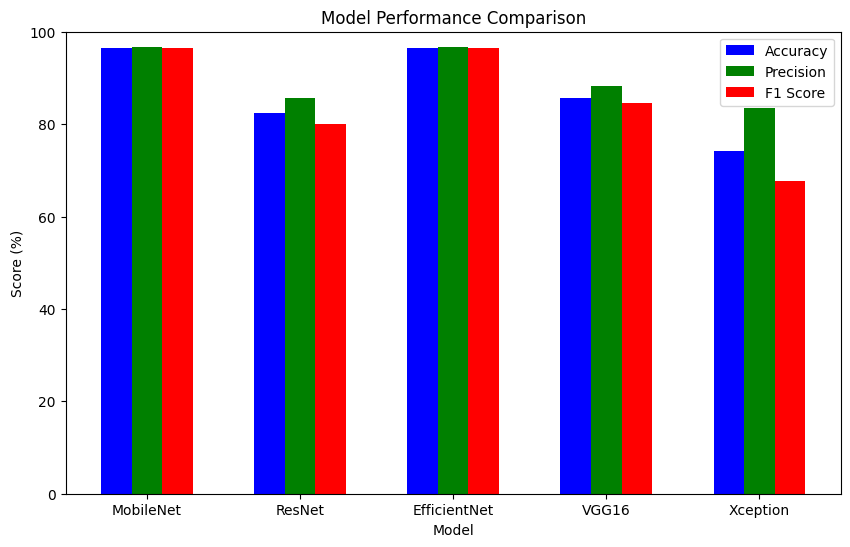

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Convert dictionary to lists
model_names = metrics["Model"]
bar_width = 0.2
index = np.arange(len(model_names))

plt.figure(figsize=(10, 6))

# Plot bars for Accuracy, Precision, and F1-Score
plt.bar(index, metrics["Accuracy"], bar_width, label="Accuracy", color='blue')
plt.bar(index + bar_width, metrics["Precision"], bar_width, label="Precision", color='green')
plt.bar(index + 2 * bar_width, metrics["F1-Score"], bar_width, label="F1 Score", color='red')

# Labels and titles
plt.xlabel("Model")
plt.ylabel("Score (%)")
plt.title("Model Performance Comparison")
plt.xticks(index + bar_width, model_names)  # Set x-axis labels at center
plt.legend()
plt.ylim(0, 100)  # Set y-axis limit

# Show plot
plt.show()
